In [1]:
!pip install seaborn

In [2]:
!pip install category_encoders

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [4]:
df=pd.read_csv('C:\internship\Car.dataset\car.data')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [6]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [7]:
df.rpow

<bound method flex_arith_method_FRAME.<locals>.f of       vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [10]:
df.columns = col_names

In [11]:
col_names= ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df.value_counts())

buying  maint  doors  persons  lug_boot  safety  class
high    high   2      2        big       high    unacc    1
med     med    4      more     small     med     acc      1
                                         high    acc      1
                               med       med     acc      1
                                         low     unacc    1
                                                         ..
low     low    3      2        med       med     unacc    1
                                         low     unacc    1
                                         high    unacc    1
                               big       med     unacc    1
vhigh   vhigh  5more  more     small     med     unacc    1
Name: count, Length: 1727, dtype: int64
buying  maint  doors  persons  lug_boot  safety  class
high    high   2      2        big       high    unacc    1
med     med    4      more     small     med     acc      1
                                         high    acc      1
          

In [12]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [13]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [14]:
x=df.drop(['class'],axis=1)

In [15]:
y=df['class']

In [16]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 42)

In [17]:
x_train.shape, x_test.shape

((1208, 6), (519, 6))

In [18]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,med,med,5more,4,big,high
585,high,high,3,more,small,med
1551,low,med,3,4,med,med
727,high,med,4,more,big,high
707,high,med,4,2,big,low


In [27]:
import category_encoders as ce

In [28]:
encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [21]:
x_train.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [22]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,1,1,1,1,1,1
585,2,2,2,2,2,2
1551,3,1,2,1,3,2
727,2,1,3,2,1,1
707,2,1,3,3,1,3


In [23]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,3,1,3
932,1,3,3,1,1,3
628,2,2,1,3,1,1
1497,3,2,1,1,3,2
1262,1,4,3,2,3,3


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
# Instantiate the DeicisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [26]:
clf_gini.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


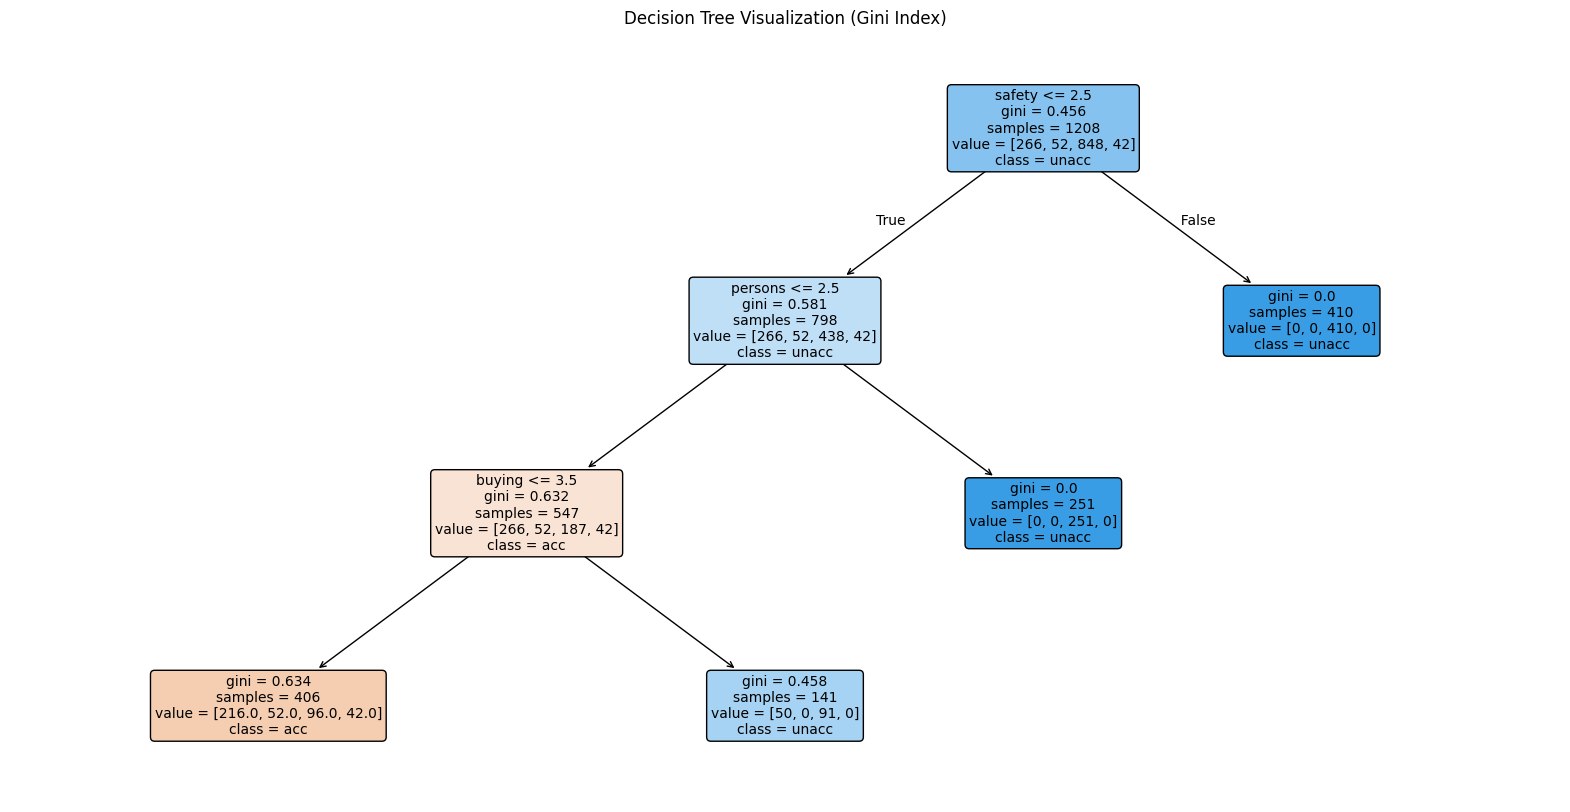

In [29]:
from sklearn import tree
import matplotlib.pyplot as plt

# Visualize the trained decision tree
plt.figure(figsize=(20,10))  # make the plot big and clear

tree.plot_tree(
    clf_gini,
    feature_names=x_train.columns,     # names of the input features
    class_names=[str(c) for c in clf_gini.classes_],  # names of the target classes
    filled=True,        # color the nodes
    rounded=True,       # round the boxes
    fontsize=10
)

plt.title("Decision Tree Visualization (Gini Index)")
plt.show()

In [30]:
y_pred_gini = clf_gini.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8150


In [32]:
# compare the train se and test set accuracy 
y_pred_train_gini = clf_gini.predict(x_train)

In [34]:
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.8013
Test set score: 0.8150


In [35]:
# decision tree with criterion entropy 
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf_en.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
y_pred_en = clf_gini.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.  format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion gini index: 0.8150


In [40]:
y_pred_en = clf_en.predict(x_test)
y_pred_en

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc',
       'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'acc',
       'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'una

In [41]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.8154
Test set score: 0.8285


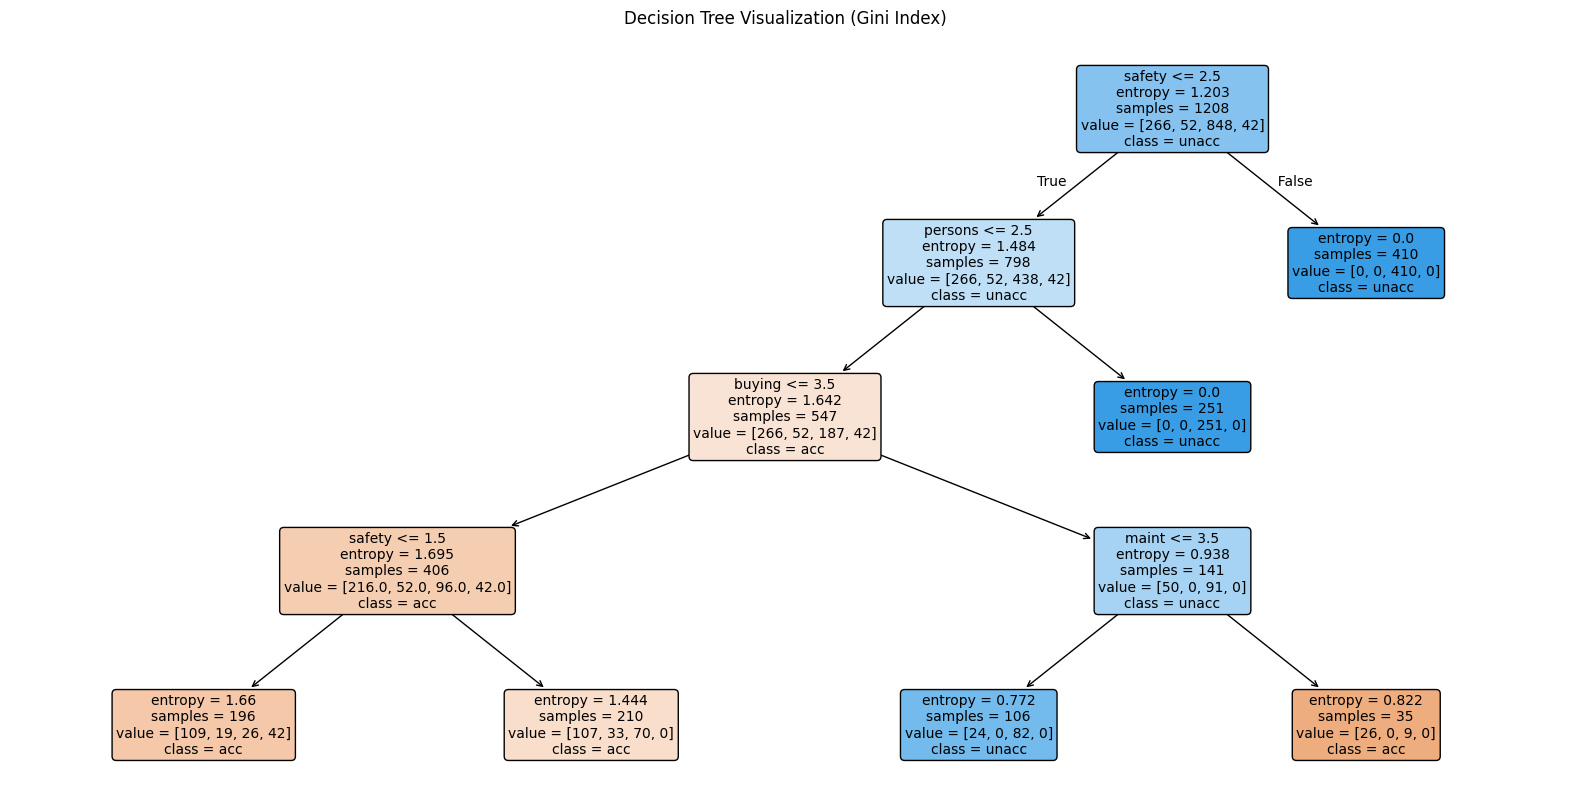

In [43]:
from sklearn import tree
import matplotlib.pyplot as plt

# Visualize the trained decision tree
plt.figure(figsize=(20,10))  # make the plot big and clear

tree.plot_tree(
    clf_en,
    feature_names=x_train.columns,     # names of the input features
    class_names=[str(c) for c in clf_en.classes_],  # names of the target classes
    filled=True,        # color the nodes
    rounded=True,       # round the boxes
    fontsize=10
)

plt.title("Decision Tree Visualization (Gini Index)")
plt.show()